# IT402 Soft Computing Lab

Submitted by: Harsh Agarwal (181IT117)

### Importing the libraries

In [1]:
from math import exp        
import pandas as pd
import numpy as np

### Setting the max no. of iterations and Threshold value

In [2]:
MAX_ITERS=50

### Reading the dataset

In [3]:
df=pd.read_csv('heart.csv')
class_values=np.unique(df['target'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Shuffling the dataset tuples

In [4]:
df = df.sample(frac=1).reset_index(drop=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
1,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
2,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
3,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1
4,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
299,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
300,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
301,53,0,0,130,264,0,0,143,0,0.4,1,0,2,1


### Normalizing the dataset values

In [5]:
class_label=df['target']
df=(df-df.mean())/df.std()
df=df.assign(target=class_label)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.700976,0.679881,0.031978,-1.232956,-0.333085,-0.416945,0.897478,0.801266,-0.69548,-0.034110,-2.270822,-0.713249,1.121174,0
1,-1.141403,0.679881,0.031978,-0.092585,-0.526020,-0.416945,-1.004171,1.674432,-0.69548,-0.895381,0.974740,-0.713249,-0.512075,1
2,0.730411,0.679881,-0.936965,0.477601,-0.757543,-0.416945,-1.004171,-0.508482,1.43311,0.741034,0.974740,0.264644,1.121174,0
3,-0.260549,-1.465992,1.000921,0.249527,-0.969772,-0.416945,-1.004171,0.844925,-0.69548,-0.809253,-0.648041,-0.713249,-0.512075,1
4,-1.141403,0.679881,1.000921,-0.662770,-0.390965,-0.416945,0.897478,0.844925,-0.69548,-0.895381,0.974740,-0.713249,-0.512075,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.730411,0.679881,1.969864,0.135490,-0.236617,-0.416945,0.897478,-0.202874,-0.69548,1.343924,-0.648041,1.242538,-0.512075,0
299,0.510197,0.679881,1.969864,1.617973,0.515832,-0.416945,-1.004171,-1.076040,-0.69548,-0.895381,0.974740,-0.713249,-0.512075,0
300,-1.361616,0.679881,1.000921,-0.662770,-0.120855,2.390484,0.897478,1.936382,-0.69548,-0.206364,-2.270822,-0.713249,1.121174,1
301,-0.150443,-1.465992,-0.936965,-0.092585,0.342190,-0.416945,-1.004171,-0.290191,-0.69548,-0.550872,-0.648041,-0.713249,-0.512075,1


### Defining Class for Neuron and with functions to update bias and weights

In [6]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights=weights
        self.bias=bias
        
    def output(self, inputs):
        y=self.bias
        y+=sum(w*ip for w,ip in zip(self.weights, inputs))
        return 1/(1+exp(-y))
    
    def update(self, l_rate, error, outputs):
        # Update bias
        self.bias=self.bias+l_rate*error
        
        # Update weights
        for i in range(len(self.weights)):
            self.weights[i]=self.weights[i]+l_rate*error*outputs[i]

In [7]:
# Returns a neuron
def train_neuron(neuron, dataset):
    for t in range(MAX_ITERS):
        total_error=0
        for row in dataset:
            X=row[:-1]
            actual=row[-1]
            pred=neuron.output(inputs=X)
            error=pred*(1-pred)*(actual-pred)
            
            neuron.update(error=error, outputs=X, l_rate=1/(t+1))
            total_error+=error
        total_error/=len(dataset)
        if total_error-0<0.00005:
            break
    return neuron

### Performing 10 Fold Cross Validation

In [9]:
skip=len(df)//10
init=0

class_count=len(class_values)
conf_matrix = pd.DataFrame(np.zeros((class_count,class_count), dtype='int'), index = class_values, columns = class_values)\
.rename_axis('Predicted')\
.rename_axis('Actual', axis="columns").T

for _ in range(10):
    test=df[init:init+skip].to_numpy()
    train=df.drop(range(init,init+skip)).to_numpy()
    init+=skip
    neuron = Neuron(weights=[1/14 for _ in range(13)], bias=1)
    neuron = train_neuron(neuron=neuron, dataset=train)
    
    for row in test:
        X=row[:-1]
        actual=row[-1]
        pred=neuron.output(inputs=X)
        if pred<0.5:
            pred=0
        else: pred=1
        conf_matrix[pred][actual]+=1
df_confusion=conf_matrix
df_confusion

Predicted,0,1
Actual,,
0,109,28
1,27,136


In [10]:
total_tp=0
total_recall=0
total_precision=0
total_f1=0

for class_type in class_values:
    TP=df_confusion.loc[class_type][class_type]
    FN=sum(df_confusion.loc[class_type , : ])-TP
    FP=sum(df_confusion[class_type])-TP
    TN=df_confusion.values.sum()-(TP+FN+FP)
    
    precision=TP/(FP+TP)
    recall=TP/(TP+FN)
    f1=2*precision*recall/(precision+recall)

    total_recall+=recall
    total_precision+=precision
    total_f1+=f1
    total_tp+=TP

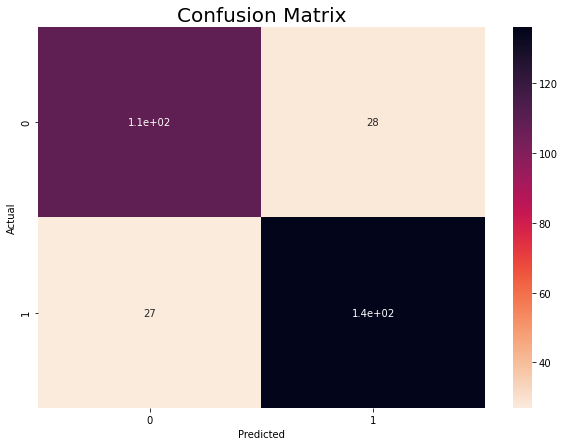

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix', fontsize = 20)
sn.heatmap(df_confusion, annot=True, cmap=sn.cm.rocket_r)
plt.show()

In [12]:
accuracy=100*total_tp/df_confusion.values.sum()
print("\nAvg Accuracy: {}%".format(round(accuracy,4)))
print("Avg precision: {}".format(round(total_precision/len(class_values),4)))
print("Avg recall: {}".format(round(total_recall/len(class_values),4)))
print("Avg f1 score: {}".format(round(total_f1/len(class_values),4)))


Avg Accuracy: 81.6667%
Avg precision: 0.8154
Avg recall: 0.815
Avg f1 score: 0.8152
